###Assigment

Your notebooks must contain the following steps:

1.  a. Perform data cleaning and pre-processing.
    b. What steps did you use in this process and how did you clean your data.
2.  a. Perform exploratory data analysis on the given dataset.
    b. Explain each and every graphs that you make.
3.  a. Train a ml-model and evaluate it using different metrics.
    b. Why did you choose that particular model? What was the accuracy?
    c. Hyperparameter optimization and feature selection is a plus.
4.  a. Model deployment and use of ml-flow is a plus.
    b. Perform model interpretation and show feature importance for your model.
    c. Provide some explanation for the above point.



**Gunakan df untuk EDA dan df_enc untuk train model**


Notes: Sebelum melakukan EDA running code semua terlebih dahulu

In [1]:
#import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML Data Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as holdout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.model_selection import (
    KFold, cross_val_score, GridSearchCV)


#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("car_price_prediction.csv",
                 na_values={
                     'Levy': '-',
                     'Mileage': '0 km',
                     'Engine volume': ['0', '20']
                 })

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### <b><span style='color:#85BB65'>|</span> Data Cleaning and Data Preprocessing</b>

In [4]:
#Membuat nama kolom menjadi format yang mudah diolah oleh pandas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.','')

In [5]:
df.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19237 non-null  int64  
 1   price             19237 non-null  int64  
 2   levy              13418 non-null  float64
 3   manufacturer      19237 non-null  object 
 4   model             19237 non-null  object 
 5   prod_year         19237 non-null  int64  
 6   category          19237 non-null  object 
 7   leather_interior  19237 non-null  object 
 8   fuel_type         19237 non-null  object 
 9   engine_volume     19225 non-null  object 
 10  mileage           18516 non-null  object 
 11  cylinders         19237 non-null  float64
 12  gear_box_type     19237 non-null  object 
 13  drive_wheels      19237 non-null  object 
 14  doors             19237 non-null  object 
 15  wheel             19237 non-null  object 
 16  color             19237 non-null  object

In [7]:
#replace irrelevant data in certain columns
df['mileage'] = df['mileage'].str.replace(' km', '')
df['doors'] = df['doors'].replace({'04-May':'4','02-Mar':'2','>5':'5'})
df['engine_volume'] = df['engine_volume'].str.replace(' Turbo', '')
df['cylinders'] = df['cylinders'].astype('float32')

In [8]:
df.duplicated().sum()

313

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.isna().sum()

id                     0
price                  0
levy                5709
manufacturer           0
model                  0
prod_year              0
category               0
leather_interior       0
fuel_type              0
engine_volume         12
mileage              714
cylinders              0
gear_box_type          0
drive_wheels           0
doors                  0
wheel                  0
color                  0
airbags                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18924 non-null  int64  
 1   price             18924 non-null  int64  
 2   levy              13215 non-null  float64
 3   manufacturer      18924 non-null  object 
 4   model             18924 non-null  object 
 5   prod_year         18924 non-null  int64  
 6   category          18924 non-null  object 
 7   leather_interior  18924 non-null  object 
 8   fuel_type         18924 non-null  object 
 9   engine_volume     18912 non-null  object 
 10  mileage           18210 non-null  object 
 11  cylinders         18924 non-null  float32
 12  gear_box_type     18924 non-null  object 
 13  drive_wheels      18924 non-null  object 
 14  doors             18924 non-null  object 
 15  wheel             18924 non-null  object 
 16  color             18924 non-null  object 
 17

In [12]:
import datetime
dt = datetime.datetime.now()
df['car_age'] = dt.year - df['prod_year']
df.drop('prod_year', axis=1, inplace=True)

In [13]:
df.columns

Index(['id', 'price', 'levy', 'manufacturer', 'model', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags', 'car_age'],
      dtype='object')

In [14]:
#change the data type not object to relevant data type
columns_to_convert = ['price', 'levy', 'engine_volume', 'mileage', 'airbags', 'car_age']

for column in columns_to_convert:
    df[column] = df[column].astype('float64')

In [15]:
#drop unreasonable price
df = df.drop(df[(df['price'] <= 1000) | (df['engine_volume'] < 1) | (df['cylinders'] < 2) ].index, axis=0).reset_index(drop=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                16304 non-null  int64  
 1   price             16304 non-null  float64
 2   levy              11033 non-null  float64
 3   manufacturer      16304 non-null  object 
 4   model             16304 non-null  object 
 5   category          16304 non-null  object 
 6   leather_interior  16304 non-null  object 
 7   fuel_type         16304 non-null  object 
 8   engine_volume     16295 non-null  float64
 9   mileage           15768 non-null  float64
 10  cylinders         16304 non-null  float32
 11  gear_box_type     16304 non-null  object 
 12  drive_wheels      16304 non-null  object 
 13  doors             16304 non-null  object 
 14  wheel             16304 non-null  object 
 15  color             16304 non-null  object 
 16  airbags           16304 non-null  float6

In [17]:
df_numeric = df.select_dtypes(include='float64')

for col in df_numeric.columns:
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    outliers = ((df_numeric[col] > high) | (df_numeric[col] < low)).sum()
    total = df_numeric.shape[0]
    print(f"Total outliers in {col} are: {outliers} - {round(100 * (outliers / total), 2)}%")

    if outliers > 0:
        df = df.loc[(df[col] <= high) & (df[col] >= low)]

Total outliers in price are: 1034 - 6.34%
Total outliers in levy are: 505 - 3.1%
Total outliers in engine_volume are: 984 - 6.04%
Total outliers in mileage are: 595 - 3.65%
Total outliers in airbags are: 0 - 0.0%
Total outliers in car_age are: 911 - 5.59%


In [18]:
df.isna().sum()

id                  0
price               0
levy                0
manufacturer        0
model               0
category            0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
gear_box_type       0
drive_wheels        0
doors               0
wheel               0
color               0
airbags             0
car_age             0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9003 entries, 0 to 16303
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                9003 non-null   int64  
 1   price             9003 non-null   float64
 2   levy              9003 non-null   float64
 3   manufacturer      9003 non-null   object 
 4   model             9003 non-null   object 
 5   category          9003 non-null   object 
 6   leather_interior  9003 non-null   object 
 7   fuel_type         9003 non-null   object 
 8   engine_volume     9003 non-null   float64
 9   mileage           9003 non-null   float64
 10  cylinders         9003 non-null   float32
 11  gear_box_type     9003 non-null   object 
 12  drive_wheels      9003 non-null   object 
 13  doors             9003 non-null   object 
 14  wheel             9003 non-null   object 
 15  color             9003 non-null   object 
 16  airbags           9003 non-null   float64
 17 

In [20]:
df.describe()

,id,price,levy,engine_volume,mileage,cylinders,airbags,car_age
count,9.003000e+03,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000
mean,4.565143e+07,17610.280906,801.221260,2.088537,121752.691658,4.238698,6.665001,10.893924
std,5.283291e+05,11260.418185,259.622294,0.553424,68568.955319,0.703566,4.081888,2.689263
min,3.175700e+07,1019.000000,247.000000,1.000000,13.000000,2.000000,0.000000,4.000000
25%,4.572755e+07,9408.000000,639.000000,1.600000,70337.000000,4.000000,4.000000,9.000000
50%,4.577671e+07,15850.000000,765.000000,2.000000,113400.000000,4.000000,4.000000,11.000000
75%,4.580310e+07,23521.000000,923.000000,2.500000,160000.000000,4.000000,12.000000,13.000000
max,4.581665e+07,47531.000000,1662.000000,3.500000,350400.000000,16.000000,16.000000,24.000000


In [21]:
df.describe(include=object)

,manufacturer,model,category,leather_interior,fuel_type,gear_box_type,drive_wheels,doors,wheel,color
count,9003,9003,9003,9003,9003,9003,9003,9003,9003,9003
unique,42,597,10,2,6,4,3,3,2,16
top,HYUNDAI,Elantra,Sedan,Yes,Petrol,Automatic,Front,4,Left wheel,White
freq,2717,768,4385,7326,4398,7378,7426,8849,8780,2325


### <b><span style='color:#85BB65'>|</span> Exploratory Data Analysis</b>

#### Top Manufacturer

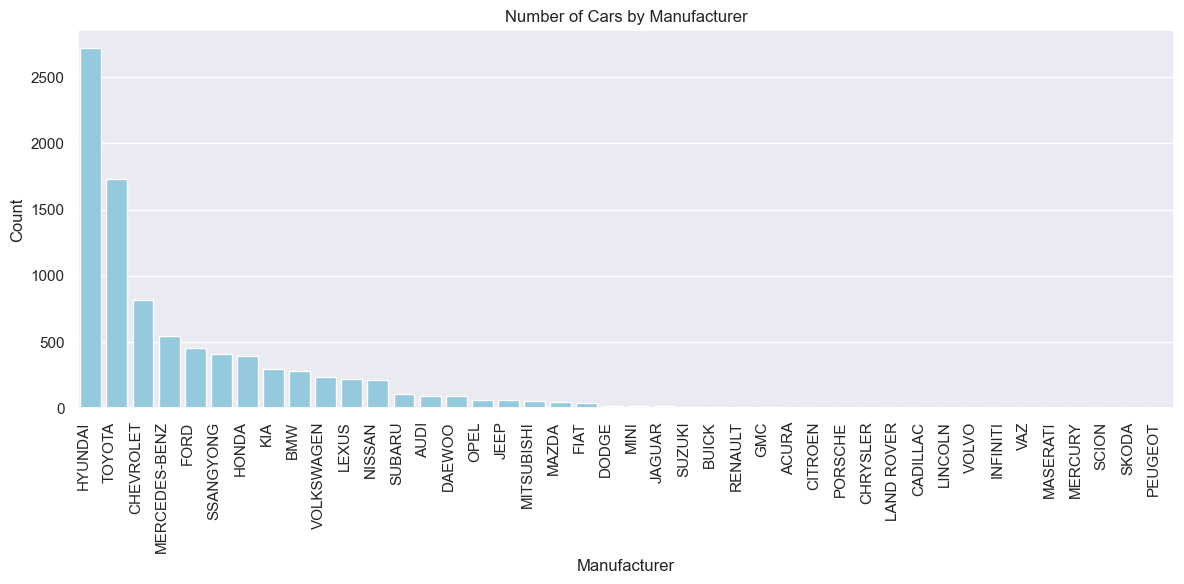

In [22]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")

sns.countplot(data=df, x="manufacturer", order=df['manufacturer'].value_counts().index, color='skyblue')

plt.xticks(rotation=90, ha="right")
plt.title('Number of Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Plot ini menampilkan jumlah entri berdasarkan produsen mobil dari yang paling banyak hingga yang paling sedikit.

#### Top Cars Category

C:\Users\acer\AppData\Local\Temp\ipykernel_18112\3204081829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="category", order=df['category'].value_counts().index, palette='coolwarm')


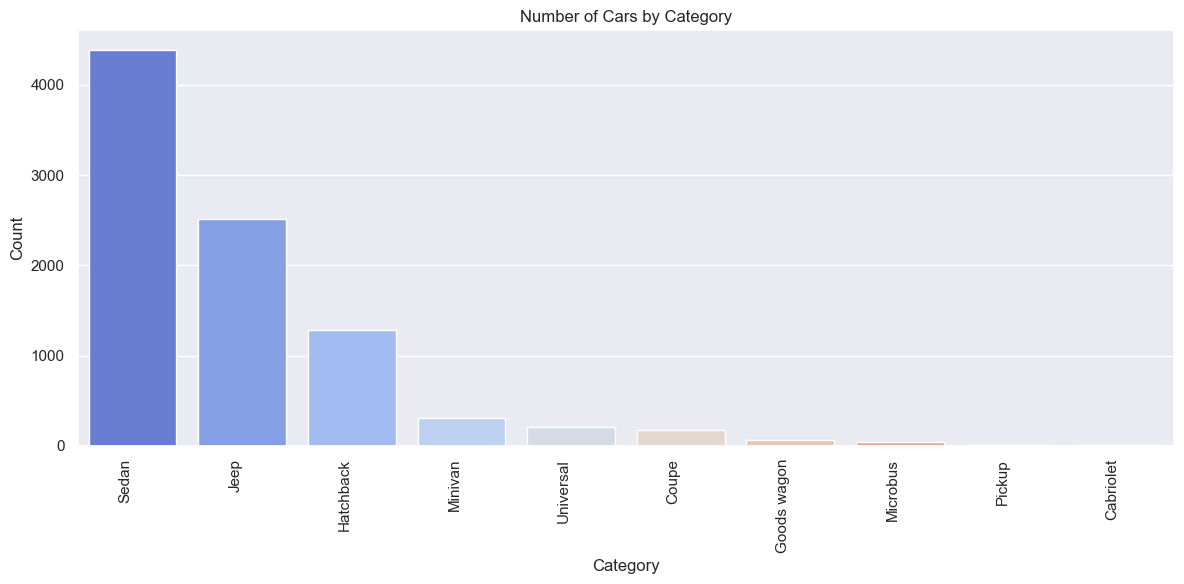

In [23]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")

sns.countplot(data=df, x="category", order=df['category'].value_counts().index, palette='coolwarm')

plt.xticks(rotation=90, ha="right")
plt.title('Number of Cars by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Sedan mendominasi penjualan tertinggi, sedangkan microbus memiliki penjualan terendah. Hal ini bisa saja disebabkan oleh preferensi konsumen pada sedan, efisiensi bahan bakar yang lebih baik, dan tren mode.

C:\Users\acer\AppData\Local\Temp\ipykernel_18112\2384127596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette=palette)


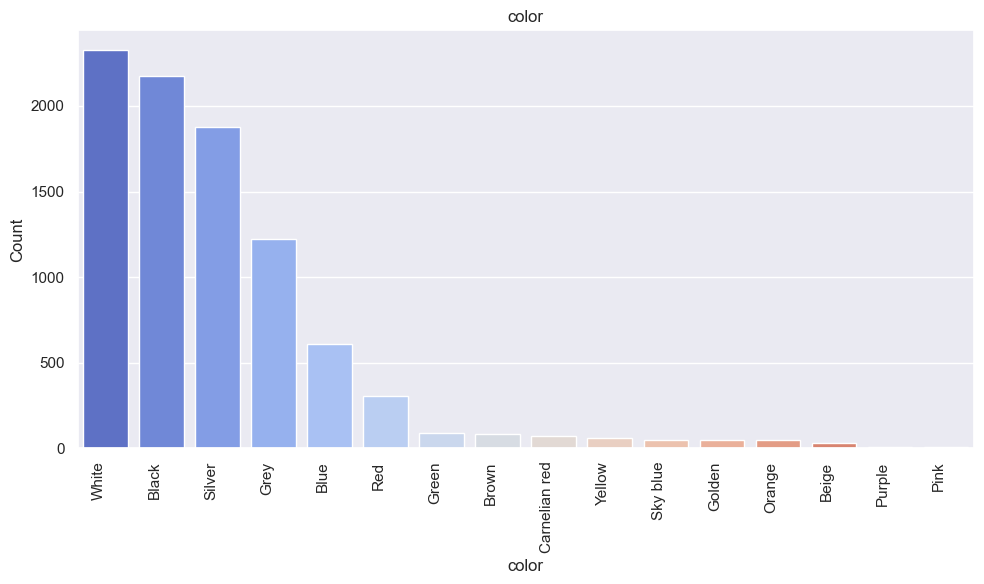

C:\Users\acer\AppData\Local\Temp\ipykernel_18112\2384127596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette=palette)


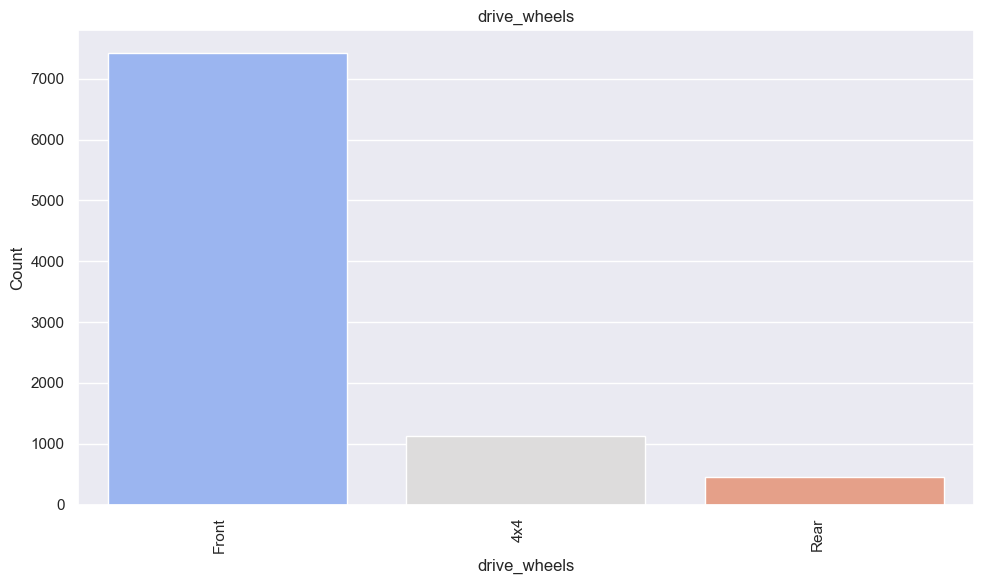

C:\Users\acer\AppData\Local\Temp\ipykernel_18112\2384127596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette=palette)


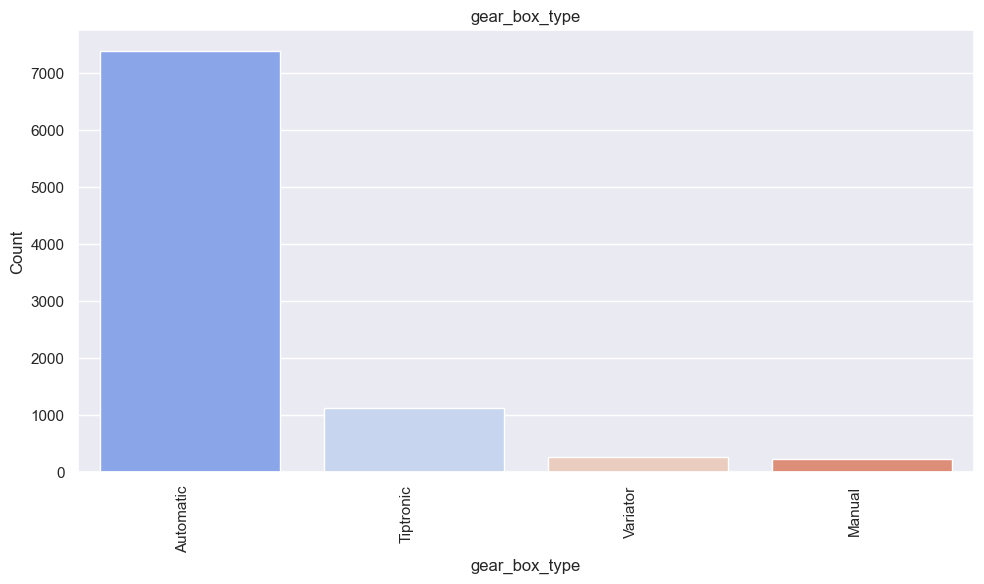

C:\Users\acer\AppData\Local\Temp\ipykernel_18112\2384127596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette=palette)


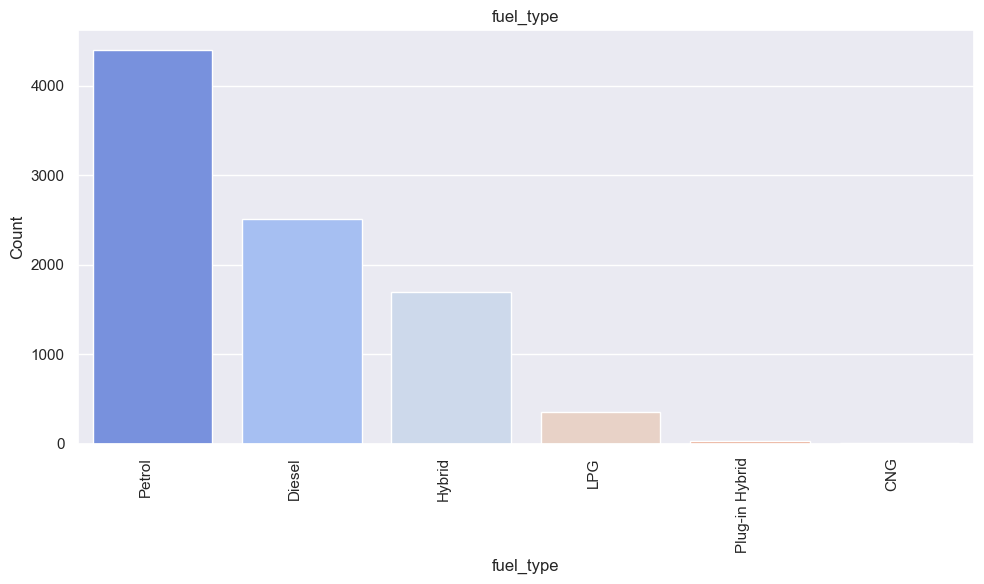

C:\Users\acer\AppData\Local\Temp\ipykernel_18112\2384127596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette=palette)


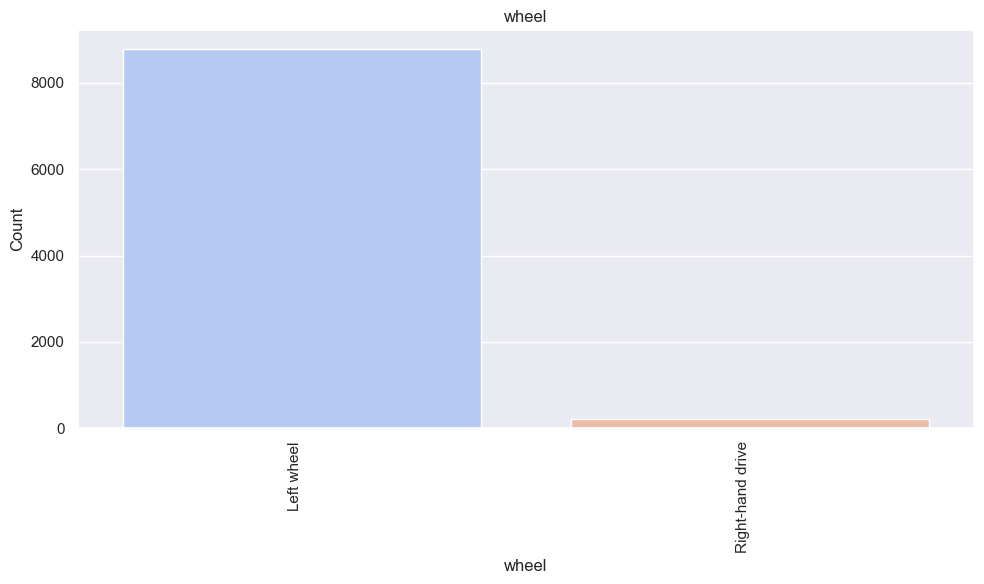

C:\Users\acer\AppData\Local\Temp\ipykernel_18112\2384127596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette=palette)


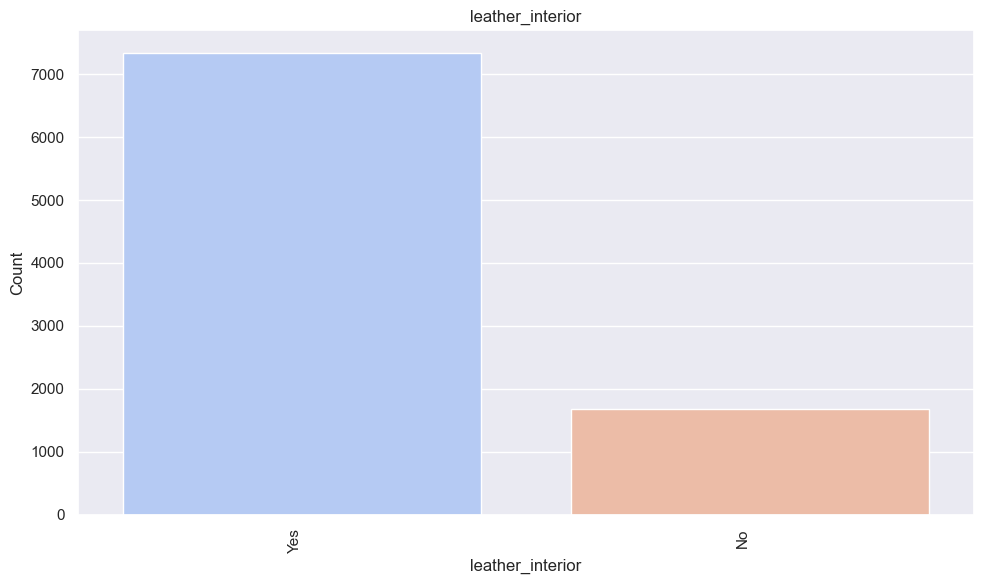

In [24]:
columns = ['color', 'drive_wheels', 'gear_box_type', 'fuel_type', 'wheel', 'leather_interior']
palette = 'coolwarm'

for column in columns:
    plt.figure(figsize=(10, 6))
    sns.set(style="darkgrid")

    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette=palette)

    plt.xticks(rotation=90, ha="right")
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Beberapa fitur populer yang dipilih adalah warna putih modern, sistem penggerak roda depan untuk jalan raya, transmisi otomatis yang mudah, bahan bakar yang umum, kemudi di sebelah kiri sesuai standar, dan interior berbahan kulit untuk menampilkan kesan mewah.

### <b><span style='color:#85BB65'>|</span> Data Encoding</b>

In [25]:
df_object = df.select_dtypes(include=object)
df_object

,manufacturer,model,category,leather_interior,fuel_type,gear_box_type,drive_wheels,doors,wheel,color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,4,Left wheel,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,4,Left wheel,Silver
5,HYUNDAI,Santa FE,Jeep,Yes,Diesel,Automatic,Front,4,Left wheel,White
...,...,...,...,...,...,...,...,...,...,...
16298,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,Automatic,4x4,4,Left wheel,Black
16299,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,Automatic,Rear,4,Left wheel,Grey
16301,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,4,Left wheel,Red
16302,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,4,Left wheel,Grey


In [26]:
for column in df_object.columns:
    print(f"{column} number of unique are: {df_object[column].nunique()}")

manufacturer number of unique are: 42
model number of unique are: 597
category number of unique are: 10
leather_interior number of unique are: 2
fuel_type number of unique are: 6
gear_box_type number of unique are: 4
drive_wheels number of unique are: 3
doors number of unique are: 3
wheel number of unique are: 2
color number of unique are: 16


In [27]:
# Recode the two categorical non numeric variable
df_enc = pd.get_dummies(
    df,
    columns=['leather_interior', 'wheel'],
    drop_first=True #drop first column
)

df_enc = df_enc.rename(
    columns={'leather_interior_Yes': 'leather_interior', 'wheel_Right-hand drive':'wheel_right_hand'}
)
df_enc = df_enc.set_index('id')
df_enc.head()

,price,levy,manufacturer,model,category,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,color,airbags,car_age,leather_interior,wheel_right_hand
id,,,,,,,,,,,,,,,,,
45654403,13328.0,1399.0,LEXUS,RX 450,Jeep,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Silver,12.0,14.0,True,False
44731507,16621.0,1018.0,CHEVROLET,Equinox,Jeep,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Black,8.0,13.0,False,False
45769185,3607.0,862.0,FORD,Escape,Jeep,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,White,0.0,13.0,True,False
45809263,11726.0,446.0,HONDA,FIT,Hatchback,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Silver,4.0,10.0,True,False
45802912,39493.0,891.0,HYUNDAI,Santa FE,Jeep,Diesel,2.0,160931.0,4.0,Automatic,Front,4,White,4.0,8.0,True,False


In [28]:
#manufacturer colomn encode
df_manufacturer = df_enc.groupby('manufacturer')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.manufacturer = df_enc.manufacturer.map(df_manufacturer)

#fuel type colomn encode
df_fuel_type = df_enc.groupby('fuel_type')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.fuel_type = df_enc.fuel_type.map(df_fuel_type)

#gear box type colomn encode
df_gear_box_type = df_enc.groupby('gear_box_type')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.gear_box_type = df_enc.gear_box_type.map(df_gear_box_type)

#drive_wheels colomn encode
df_drive_wheels = df_enc.groupby('drive_wheels')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.drive_wheels = df_enc.drive_wheels.map(df_drive_wheels)

#doors colomn encode
df_doors = df_enc.groupby('doors')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.doors = df_enc.doors.map(df_doors)

#color colomn encode
df_color = df_enc.groupby('color')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.color = df_enc.color.map(df_color)

In [29]:
df_enc.drop(['model', 'category'], axis=1, inplace=True)

In [30]:
df_enc_corr = df_enc.corr()
df_enc_corr.sum()

price               1.164537
levy                2.300826
manufacturer        1.622050
fuel_type           2.077771
engine_volume       2.579081
mileage             1.289697
cylinders           2.020396
gear_box_type       1.002380
drive_wheels       -0.698386
doors               1.043663
color               1.310268
airbags             0.727752
car_age             0.935875
leather_interior    1.401042
wheel_right_hand    0.224718
dtype: float64

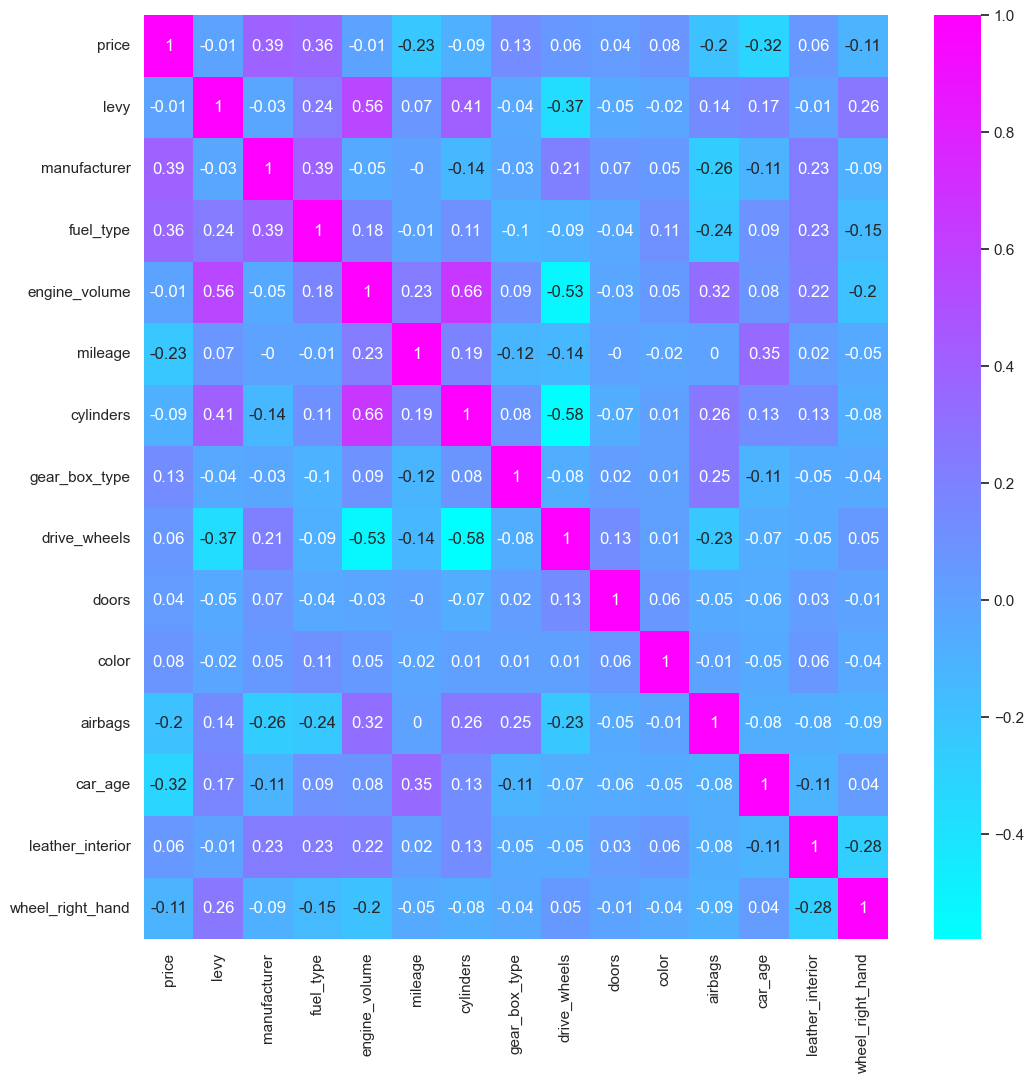

In [31]:
f, ax = plt.subplots(1, 1, figsize=(12, 12))
ax = sns.heatmap(df_enc_corr.round(2), annot=True, cmap="cool")

Nilai korelasi tinggi antara "cylinder" dan "engine volume" sebesar 0.66 menandakan hubungan yang kuat dan positif. Ini bisa terjadi karena mesin yang lebih besar dan memiliki performa tinggi cenderung memiliki lebih banyak silinder. Kendaraan kelas atas juga biasanya memiliki jumlah silinder yang lebih banyak.

In [32]:
#drop column with correlation below 0.5
df_enc.drop(['wheel_right_hand', 'drive_wheels'], axis=1, inplace=True)

In [33]:
df_enc

,price,levy,manufacturer,fuel_type,engine_volume,mileage,cylinders,gear_box_type,doors,color,airbags,car_age,leather_interior
id,,,,,,,,,,,,,
45654403,13328.0,1399.0,13351.246637,12170.808486,3.5,186005.0,6.0,17249.669152,17665.179342,17279.314301,12.0,14.0,True
44731507,16621.0,1018.0,15303.871007,16569.341519,3.0,192000.0,6.0,21097.235556,17665.179342,17406.617403,8.0,13.0,False
45769185,3607.0,862.0,14040.396061,12170.808486,2.5,168966.0,4.0,17249.669152,17665.179342,18184.712688,0.0,13.0,True
45809263,11726.0,446.0,16123.089514,16569.341519,1.3,91901.0,4.0,17249.669152,17665.179342,17279.314301,4.0,10.0,True
45802912,39493.0,891.0,21504.128819,23474.326286,2.0,160931.0,4.0,17249.669152,17665.179342,18184.712688,4.0,8.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45769427,29793.0,1053.0,15543.265938,23474.326286,3.5,219030.0,6.0,17249.669152,17665.179342,17406.617403,12.0,10.0,True
45772306,5802.0,1055.0,15543.265938,23474.326286,3.5,107800.0,6.0,17249.669152,17665.179342,18793.722813,12.0,11.0,True
45778856,15681.0,831.0,21504.128819,16569.341519,2.4,161600.0,4.0,21097.235556,17665.179342,15525.904605,8.0,13.0,True


### <b><span style='color:#85BB65'>|</span> Data Scaling</b>

In [34]:
#Lakukan scaling (Jika perlu) --> Boleh eksperimen menggunakan berbagai macam scaling
df_enc_scaler= df_enc.copy()
#Standard Scaler menggunakan data_stdr

#for train model
#x= df_enc_scaler.drop(columns=['price'], axis=1)
#y = df_enc_scaler['price']

#Test train split dengan beberapa metode (Random, K-Fold split) --> Random bisa test data percentage diubah2
#0.2, 0.25, 0.3, 0.33

#### StandarScaler

In [35]:
std_scaler = StandardScaler()

# Menggunakan fit_transform untuk melakukan standard scaling pada DataFrame
scaled_df_ss = std_scaler.fit_transform(df_enc_scaler)

# Mengonversi hasil scaling kembali ke DataFrame
stdr_data = pd.DataFrame(scaled_df_ss, columns=df_enc_scaler.columns)

print("\nDataFrame Setelah Standard Scaling:")
print(stdr_data)


DataFrame Setelah Standard Scaling:
         price      levy  manufacturer  fuel_type  engine_volume   mileage  \
0    -0.380316  2.302622     -0.959918  -1.358419       2.550560  0.937099   
1    -0.087860  0.835024     -0.519828  -0.259958       1.647043  1.024534   
2    -1.243654  0.234117     -0.804594  -1.358419       0.743527  0.688590   
3    -0.522592 -1.368299     -0.335189  -0.259958      -1.424912 -0.435377   
4     1.943439  0.345824      0.877610   1.464449      -0.159990  0.571403   
...        ...       ...           ...        ...            ...       ...   
8998  1.081967  0.969842     -0.465872   1.464449       2.550560  1.418757   
8999 -1.048712  0.977546     -0.465872   1.464449       2.550560 -0.203495   
9000 -0.171342  0.114707      0.877610  -0.259958       0.562824  0.581160   
9001  0.754696  0.133966      0.877610   1.464449      -0.159990 -0.078578   
9002 -1.090542  1.875054     -0.519828   1.464449      -0.159990 -1.028142   

      cylinders  gear_box_

### <b><span style='color:#85BB65'>|</span> Apply Model</b>

In [36]:
x = df_enc.drop(["price"], axis=1)
y = df_enc[["price"]]

# Split first then scale
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

Linear Regression

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Lin_reg = LinearRegression()
Lin_reg.fit(x_train_scaled, y_train)
y_train_pred = Lin_reg.predict(x_train_scaled)
y_test_pred = Lin_reg.predict(x_test_scaled)
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

print("MSE Train: ", metrics.mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", metrics.r2_score(y_train, y_train_pred))

print("MSE Test: ", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", metrics.r2_score(y_test, y_test_pred))

MSE Train:  81414890.33845216
MAE Train:  7144.280746604882
R2 Train:  0.3518716291690065
MSE Test:  80504179.48646252
MAE Test:  7081.112799570757
R2 Test:  0.3867161965020408


In [38]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,23505.0,27746.49
1,30238.0,25813.13
2,19757.0,25732.07
3,18189.0,17218.04
4,5488.0,11859.69
...,...,...
1796,24462.0,17779.92
1797,9408.0,17930.84
1798,5488.0,11859.69
1799,4861.0,17509.96


Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(x_train_scaled, y_train)

# Prediksi pada data latih
y_train_pred = lasso_reg.predict(x_train_scaled)

# Prediksi pada data uji
y_test_pred = lasso_reg.predict(x_test_scaled)

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

MSE Train:  81414909.86967686
MAE Train:  7144.305431745502
R2 Train:  0.3518714736846622
MSE Test:  80506640.40379256
MAE Test:  7081.255065456252
R2 Test:  0.38669744914320936


In [40]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,23505.0,27740.99
1,30238.0,25809.79
2,19757.0,25727.23
3,18189.0,17215.13
4,5488.0,11855.07
...,...,...
1796,24462.0,17775.90
1797,9408.0,17924.00
1798,5488.0,11855.07
1799,4861.0,17508.06


Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train_scaled, y_train)

# Prediksi pada data latih
y_train_pred = rf_reg.predict(x_train_scaled)

# Prediksi pada data uji
y_test_pred = rf_reg.predict(x_test_scaled)

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

C:\Users\acer\AppData\Local\Temp\ipykernel_18112\3480717075.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train_scaled, y_train)


MSE Train:  4512543.969563967
MAE Train:  1329.224392981115
R2 Train:  0.964076500513133
MSE Test:  29023555.17940071
MAE Test:  3416.623678792354
R2 Test:  0.7788974879937888


In [42]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,23505.0,30035.37
1,30238.0,20706.47
2,19757.0,19352.08
3,18189.0,13380.16
4,5488.0,5488.00
...,...,...
1796,24462.0,18064.93
1797,9408.0,13790.93
1798,5488.0,5488.00
1799,4861.0,4861.00


Decision Tree Regression

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train_scaled, y_train)

# Prediksi pada data latih
y_train_pred = dt_reg.predict(x_train_scaled)

# Prediksi pada data uji
y_test_pred = dt_reg.predict(x_test_scaled)

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

MSE Train:  405623.5142480263
MAE Train:  78.20037853241826
R2 Train:  0.9967709087813369
MSE Test:  52661856.49226289
MAE Test:  4292.058941020421
R2 Test:  0.5988200382283302


In [44]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,23505.0,27541.0
1,30238.0,22947.0
2,19757.0,17405.0
3,18189.0,10506.0
4,5488.0,5488.0
...,...,...
1796,24462.0,14113.0
1797,9408.0,18817.0
1798,5488.0,5488.0
1799,4861.0,4861.0


XGB Regression

In [45]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(x_train_scaled, y_train)

# Prediksi pada data latih
y_train_pred = xgb_reg.predict(x_train_scaled)

# Prediksi pada data uji
y_test_pred = xgb_reg.predict(x_test_scaled)

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,23505.0,27981.320312
1,30238.0,17447.589844
2,19757.0,16724.000000
3,18189.0,10221.500000
4,5488.0,6304.000000
...,...,...
1796,24462.0,21154.449219
1797,9408.0,12951.209961
1798,5488.0,6304.000000
1799,4861.0,6209.700195


KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

kr = KNeighborsRegressor()
kr.fit(x_train_scaled, y_train)

# Prediksi pada data latih
y_train_pred = kr.predict(x_train_scaled)

# Prediksi pada data uji
y_test_pred = kr.predict(x_test_scaled)

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

MSE Train:  26403172.132118855
MAE Train:  3323.44698694807
R2 Train:  0.7898093964430706
MSE Test:  41803840.122998334
MAE Test:  4202.738256524153
R2 Test:  0.6815368067223864


### <b><span style='color:#85BB65'>|</span> Hyperparameter Tuning (Random Forest Model)</b>

In [ ]:
y_train_flattened = y_train.values.ravel()

param_grid = {
    'max_depth': [3, 5, 6, 7, 8],
    'max_features': [2, 4, 6, 7, 8, 9],
    'n_estimators' : [50, 100],
    'min_samples_split': [3, 5, 6, 7]
}

randFor_grid = GridSearchCV(RandomForestRegressor(), param_grid, cv = 5, refit = True, verbose = 0)
randFor_grid.fit(x_train_scaled, y_train_flattened)
print(randFor_grid.best_params_)

{'max_depth': 8, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 50}


In [ ]:
rf_reg = RandomForestRegressor(max_depth = 8, max_features = 9, min_samples_split = 3, n_estimators = 100)
rf_reg.fit(x_train_scaled, y_train_flattened)

# Prediksi pada data latih
y_train_pred = rf_reg.predict(x_train_scaled)

# Prediksi pada data uji
y_test_pred = rf_reg.predict(x_test_scaled)

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train_flattened, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train_flattened, y_train_pred))
print("R2 Train: ", r2_score(y_train_flattened, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

MSE Train:  33015727.669276394
MAE Train:  4230.77070091327
R2 Train:  0.7371681065081358
MSE Test:  40759265.547639795
MAE Test:  4659.454620319979
R2 Test:  0.689494414298784


Insight:

Kami memilih model Random Forest karena dari hasil evaluasi yang diberikan, model ini menunjukkan kinerja yang lebih baik dibandingkan dengan model lainnya, baik pada data latih maupun data uji. Random Forest memberikan MSE yang lebih rendah dan R^2 yang lebih tinggi, menunjukkan bahwa model ini mampu menyesuaikan data dengan lebih baik dan menghasilkan prediksi yang lebih akurat.

### <b><span style='color:#85BB65'>|</span> Save Model</b>

In [ ]:
#menyimpan model terpilih
#import pickle
#pickle.dump(rf_reg, open("RF_model.pkl","wb"))